In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [3]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [5]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [6]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Heatmaps

## individual animal

In [51]:
col_order = ["OMCc", "AUD", "STR", 'TH',  "AMY", 'HY', 'SNr', 'SCm', 'PG', 'PAG',
             'BS', 'OMCi', 'type']


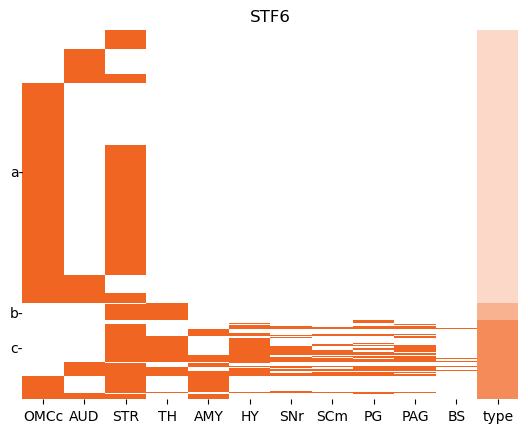

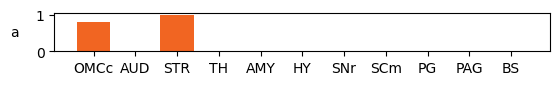

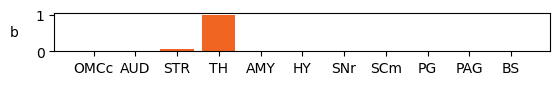

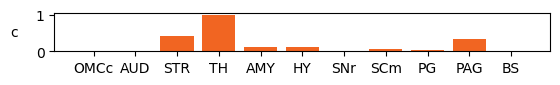

In [160]:
# plot STF6 only, mice[10]
i=10
sort_order = ['type', 'OMCc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":400, "b":800, "c":900}

sorted_heatmap(omc_preprocess[i][col_order], sort_by=sort_order, sort_ascend=True, title=mice[i], drop=["OMCi"],
               label_neurons=neurons)

plt.savefig(out_path+"OMC_heatmap_mapseq_STF6.svg", dpi=300, bbox_inches="tight")
plt.show()

for key in neurons.keys():
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = omc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons[key], label=key, sort_by=[])
       plt.savefig(out_path+"OMC_heatmap_mapseq_STF6"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


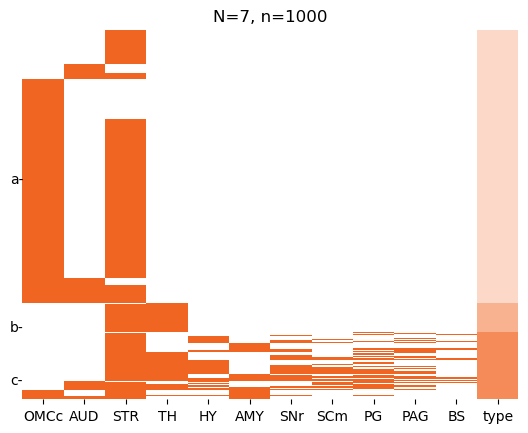

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


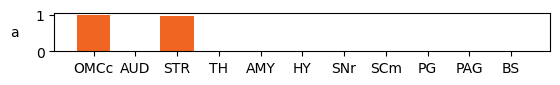

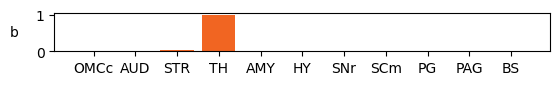

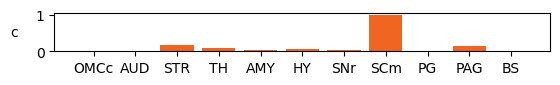

In [161]:
# plot 1000 neurons sampled from all only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omc_st = np.take(omc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(omc_st).reset_index(drop=True)


neurons = {"a":400, "b":800, "c":945}

idx, fig = sorted_heatmap(plot_st, sort_by=sort_order, title="N=7, n=1000", drop=["OMCi"],
               nsample=1000, label_neurons=neurons)
plt.savefig(out_path+"OMC_heatmap_mapseq_ST_1000.svg", dpi=300, bbox_inches="tight")
plt.show(fig)


stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omcN_st = np.take(omc_preprocessN, stidx) # just get steg from list
plotN_st = pd.concat(omcN_st).reset_index(drop=True)
plotN = plotN_st.loc[idx,:].reset_index(drop=True)
for key in neurons.keys():
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = plotN[col_order]
       single_neuron_bar(plot, neurons[key], label=key, sort_by=[])
       plt.savefig(out_path+"OMC_heatmap_mapseq_ST_1000_neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()

# umap/clustering???

# Polar plots

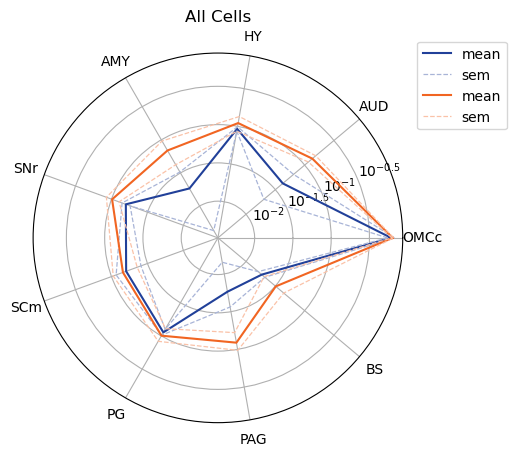

In [11]:
proportion_polar_plot(omc_type, title="All Cells")
plt.show()

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

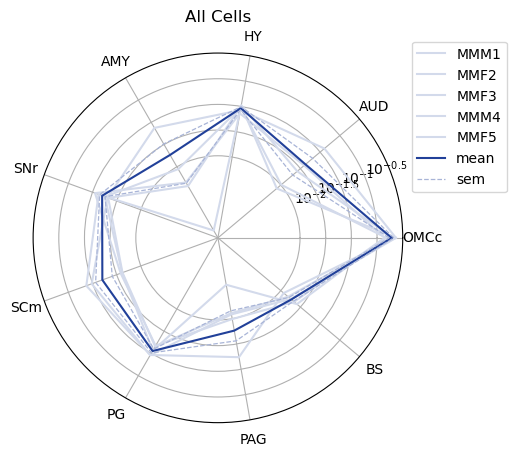

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set

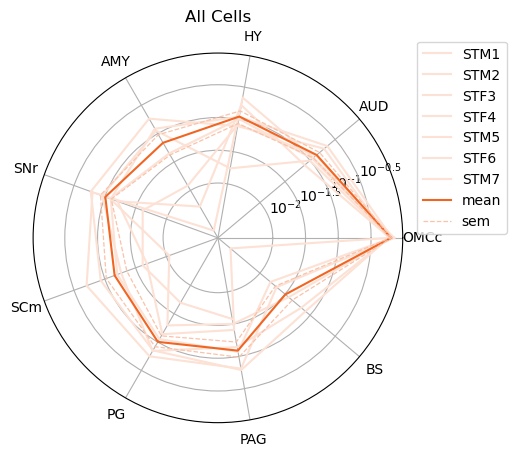

In [62]:
omc_mm = [omc_type[i] for i in range(len(omc_type)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(omc_mm, title="All Cells", plot_individuals=True, meta=meta_mm)
plt.show()

omc_st = [omc_type[i] for i in range(len(omc_type)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(omc_st, title="All Cells", plot_individuals=True, meta=meta_st)
plt.show()

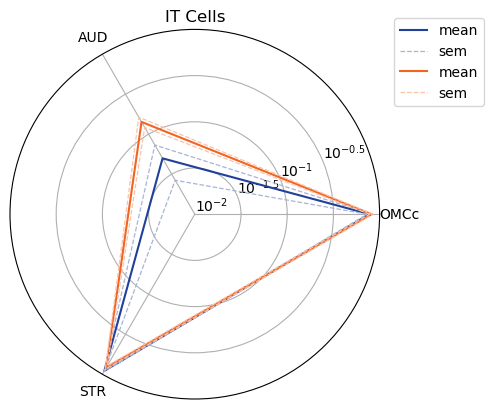

In [53]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
proportion_polar_plot(omc_it, title="IT Cells", cell_type="IT")
plt.show()


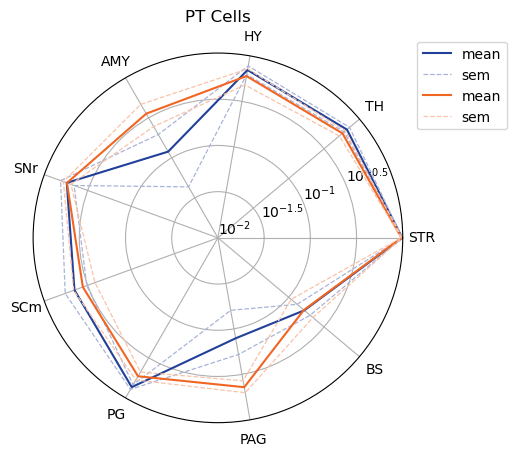

In [54]:
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
proportion_polar_plot(omc_pt, title="PT Cells", cell_type="PT")
plt.show()


# Dot Plots

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


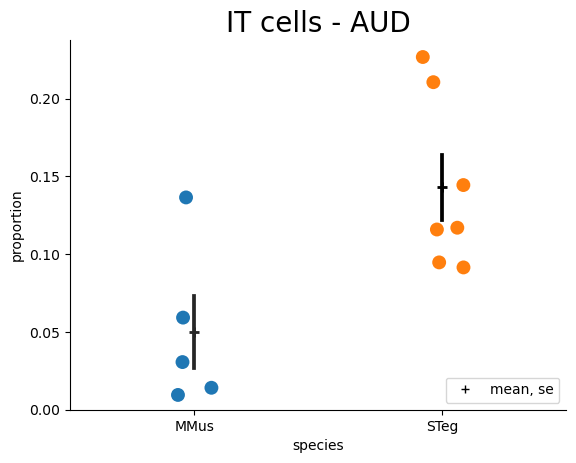

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


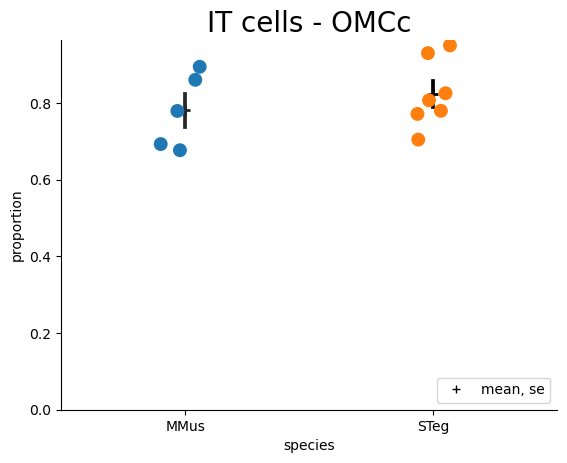

In [166]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_it, cell_type="IT")

# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD")
plt.savefig(out_path+"OMC_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_df, "OMCc", title="IT cells - OMCc")
plt.savefig(out_path+"OMC_OMCc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


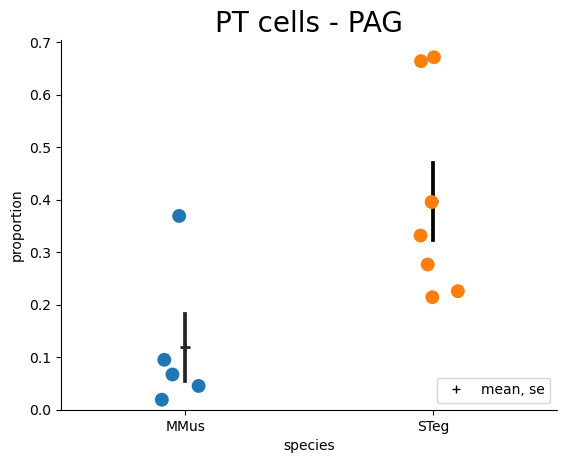

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


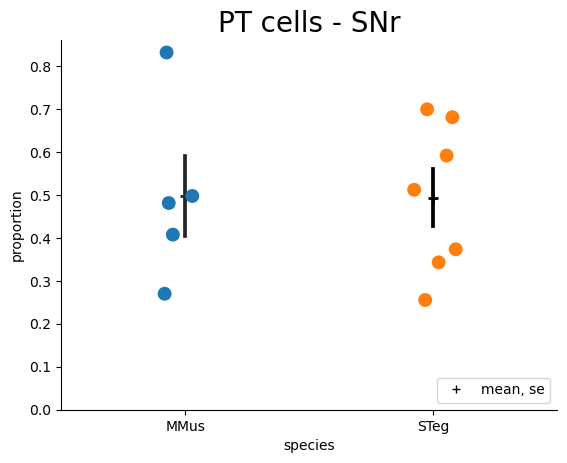

In [158]:

omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG")
plt.savefig(out_path+"OMC_PAG_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr")
plt.savefig(out_path+"OMC_SNr_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

## Add Sampled lab mouse

In [7]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


plot_it = pd.concat([omc_it_prop, mm_it_sim_prop])
plot_pt = pd.concat([omc_pt_prop, mm_pt_sim_prop])

mm_all.shape[0] 53315
sampled: 535
update mm_pool.shape[0] 52780
sampled: 443
update mm_pool.shape[0] 52337
sampled: 306
update mm_pool.shape[0] 52031
sampled: 675
update mm_pool.shape[0] 51356
sampled: 380
update mm_pool.shape[0] 50976
sampled: 776
update mm_pool.shape[0] 50200
sampled: 527
update mm_pool.shape[0] 49673
mm_all.shape[0] 9259
sampled: 93
update mm_pool.shape[0] 9166
sampled: 47
update mm_pool.shape[0] 9119
sampled: 70
update mm_pool.shape[0] 9049
sampled: 211
update mm_pool.shape[0] 8838
sampled: 119
update mm_pool.shape[0] 8719
sampled: 225
update mm_pool.shape[0] 8494
sampled: 216
update mm_pool.shape[0] 8278


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

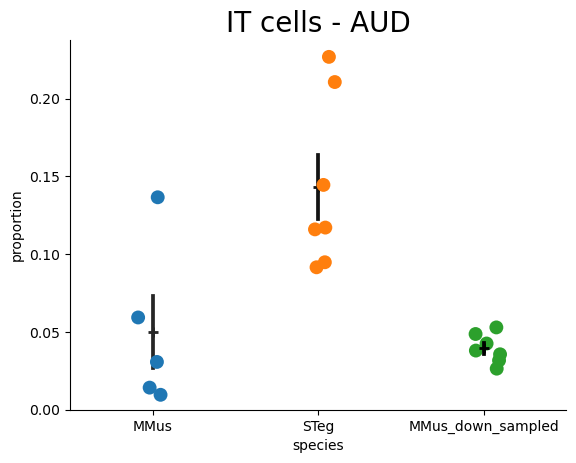

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

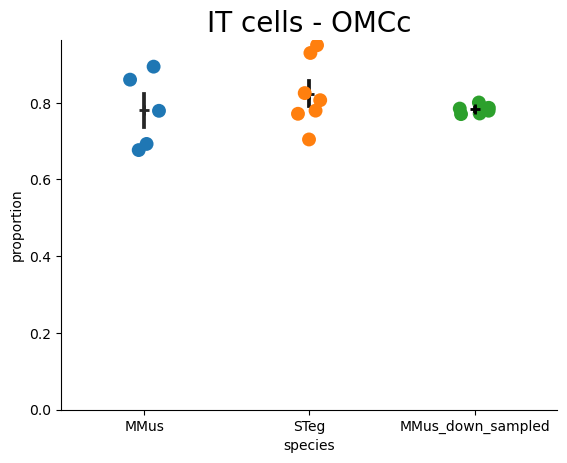

In [221]:
# AUD
area_proportion_dot_plot(plot_it, "AUD", title="IT cells - AUD", add_legend=False)
# plt.savefig(out_path+"OMC_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_it, "OMCc", title="IT cells - OMCc", add_legend=False)
# plt.savefig(out_path+"OMC_OMCc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

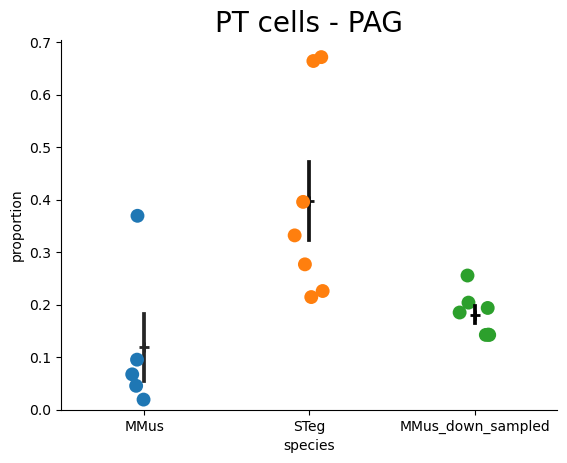

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

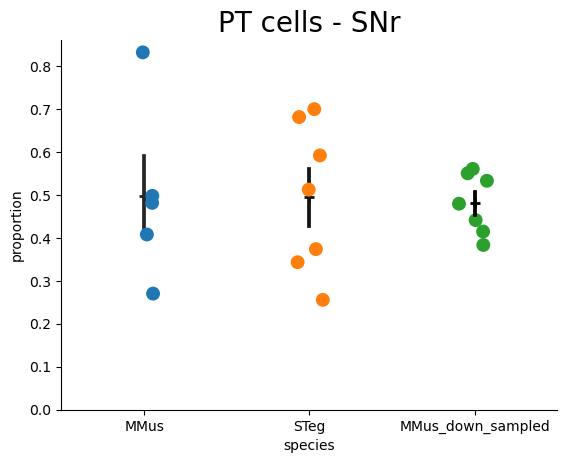

In [223]:
# PAG
area_proportion_dot_plot(plot_pt, "PAG", title="PT cells - PAG", add_legend=False)
# plt.savefig(out_path+"OMC_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_pt, "SNr", title="PT cells - SNr", add_legend=False)
# plt.savefig(out_path+"OMC_OMCc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# Estimated error

## MMus x MMus_down Sampled

In [123]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


sim_it_prop = pd.concat([omc_it_prop, mm_it_sim_prop])
sim_pt_prop = pd.concat([omc_pt_prop, mm_pt_sim_prop])

sim_it_prop['type'] = "IT"
sim_pt_prop['type'] = "PT"

# get rid of STR from pt
sim_pt_prop = sim_pt_prop[sim_pt_prop['area'] != "STR"]

sim_prop = pd.concat([sim_it_prop, sim_pt_prop]).reset_index(drop=True)
sim_prop

,area,proportion,mice,species,dataset,type
0,OMCc,0.676602,MMM1,MMus,M194,IT
1,AUD,0.014118,MMM1,MMus,M194,IT
2,STR,0.863159,MMM1,MMus,M194,IT
3,OMCc,0.692644,MMF2,MMus,M194,IT
4,AUD,0.059234,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
204,SNr,0.532407,MMM4,MMus_down_sampled,M220,PT
205,SCm,0.495370,MMM4,MMus_down_sampled,M220,PT
206,PG,0.625000,MMM4,MMus_down_sampled,M220,PT
207,PAG,0.203704,MMM4,MMus_down_sampled,M220,PT


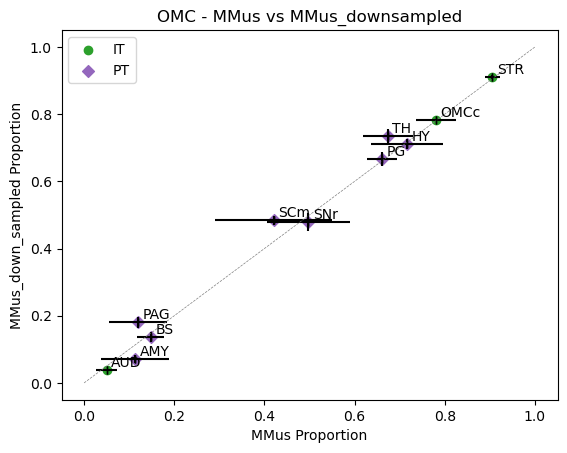

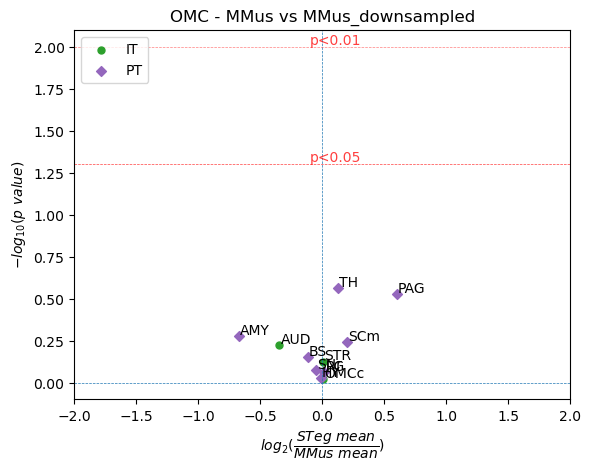

In [159]:
plot = stvmm_calc_stats(sim_prop, species=["STeg", "MMus", "MMus_down_sampled"])


# scatter
stvmm_area_scatter_type(plot, title="OMC - MMus vs MMus_downsampled", x="MMus", y="MMus_down_sampled")
# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# volcano
plot = stvmm_calc_ttest(sim_prop, sp1="MMus", sp2="MMus_down_sampled")
plot_volcano(plot, title="OMC - MMus vs MMus_downsampled", shape='type')
plt.show()


## MMus x MMus

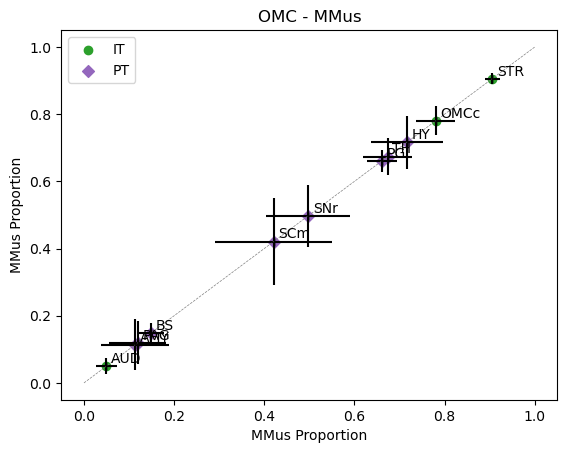

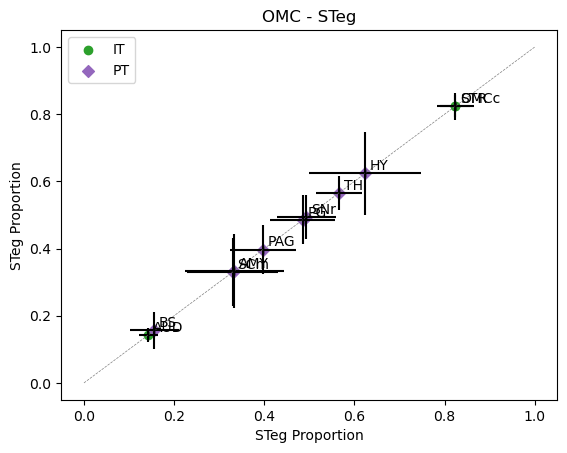

In [8]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")
omc_pt = [df[df["type"]=="PT"].drop(["type", "STR"], axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

it_stats = stvmm_calc_stats(omc_it_prop)
it_stats['type'] = "IT"
pt_stats = stvmm_calc_stats(omc_pt_prop)
pt_stats['type'] = "PT"
stats = pd.concat([it_stats, pt_stats])


stvmm_area_scatter_type(stats, title="OMC - MMus", species="MMus")
# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

stvmm_area_scatter_type(stats, title="OMC - STeg", species="STeg")
# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

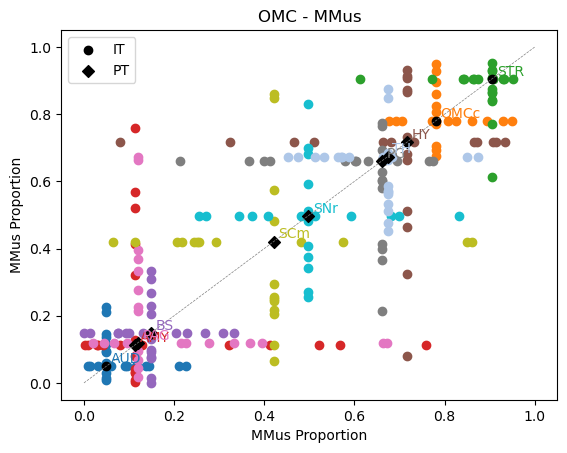

In [70]:
omc_it_prop['type'] = "IT"
omc_pt_prop['type'] = "PT"
omc_prop = pd.concat([omc_it_prop, omc_pt_prop])


stvmm_area_scatter_individ(stats.reset_index(), omc_prop, title="OMC - MMus", species="MMus")
plt.show()

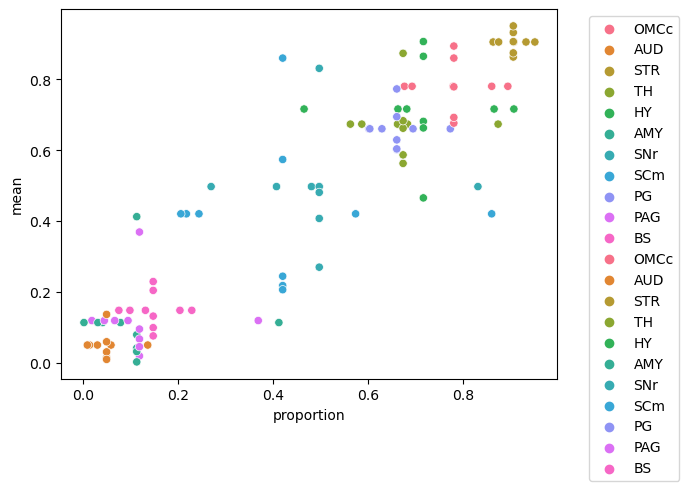

In [96]:
stats_mm = stats[stats['species']=="MMus"].reset_index()
omc_prop_mm = omc_prop[omc_prop['species']=="MMus"].reset_index(drop=True)

plot = omc_prop_mm.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_mm[stats_mm['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']

sns.scatterplot(plot, x='proportion', y='mean', hue='area')
sns.scatterplot(plot, x='mean', y='proportion', hue='area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

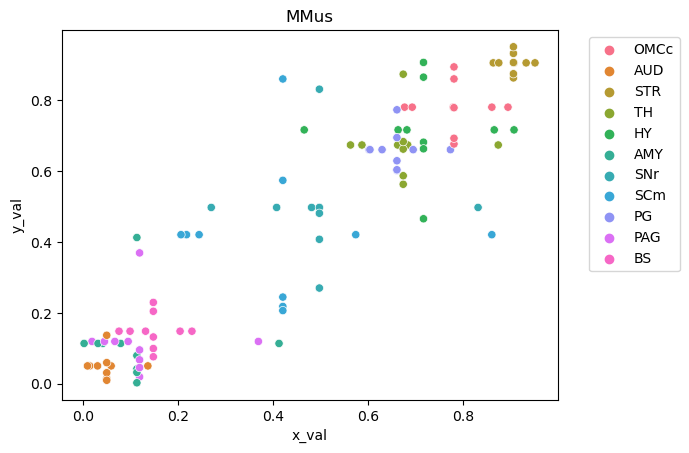

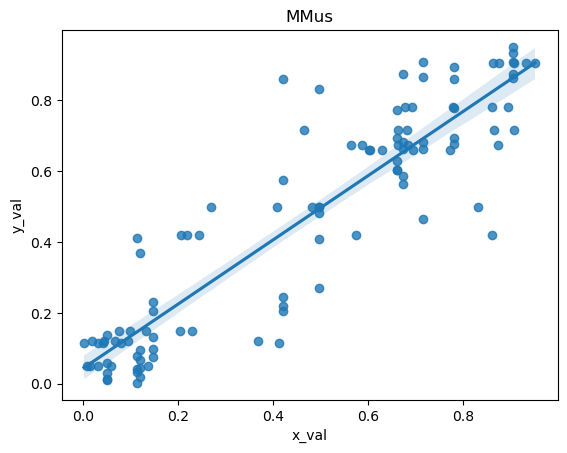

In [113]:
stats_mm = stats[stats['species']=="MMus"].reset_index()
omc_prop_mm = omc_prop[omc_prop['species']=="MMus"].reset_index(drop=True)

plot = omc_prop_mm.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_mm[stats_mm['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']


# plot regression
plot_reg = pd.DataFrame()
int1 = pd.DataFrame({'x_val':plot['proportion'], 'y_val':plot['mean'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})
int2 = pd.DataFrame({'x_val':plot['mean'], 'y_val':plot['proportion'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})

plot_reg = pd.concat([int1, int2])
sns.scatterplot(plot_reg, x='x_val', y='y_val', hue='area')
plt.title("MMus")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sns.regplot(plot_reg, x='x_val', y='y_val')
plt.title("MMus")
plt.show()

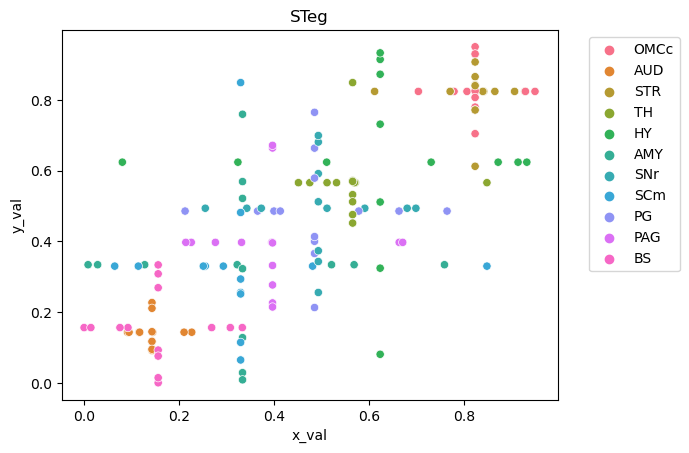

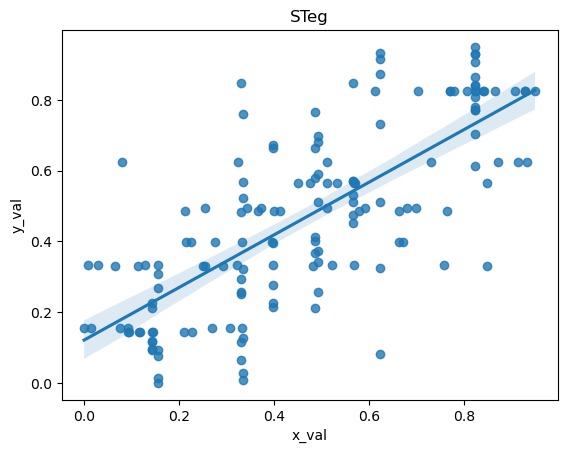

In [112]:
stats_st = stats[stats['species']=="STeg"].reset_index()
omc_prop_st = omc_prop[omc_prop['species']=="STeg"].reset_index(drop=True)

plot = omc_prop_st.copy()
for i in range(plot.shape[0]):
    area = plot.loc[i,'area']
    ar_row = stats_st[stats_st['area']==area].reset_index(drop=True)
    plot.loc[i,'mean'] = ar_row.loc[0,'mean']

# plot regression
plot_reg = pd.DataFrame()
int1 = pd.DataFrame({'x_val':plot['proportion'], 'y_val':plot['mean'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})
int2 = pd.DataFrame({'x_val':plot['mean'], 'y_val':plot['proportion'], 'area':plot['area'], 
                     'type':plot['type'], 'mice':plot['mice']})

plot_reg = pd.concat([int1, int2])
sns.scatterplot(plot_reg, x='x_val', y='y_val', hue='area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("STeg")
plt.show()

sns.regplot(plot_reg, x='x_val', y='y_val')
plt.title("STeg")
plt.show()

# Volcano Plots

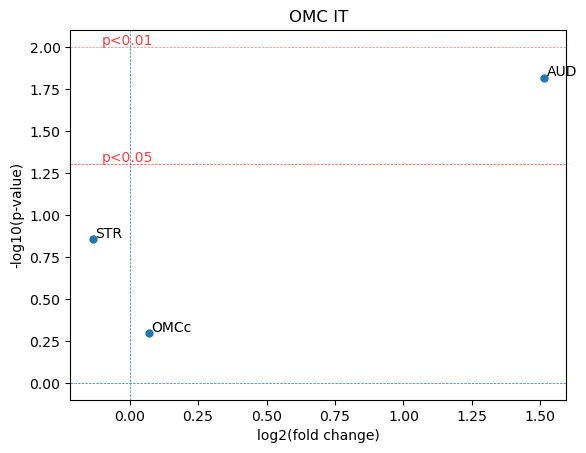

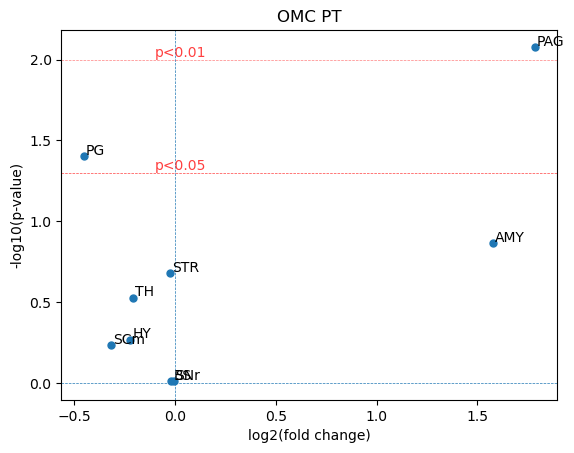

In [169]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_it, cell_type="IT")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="OMC IT")
plt.show()

# PT
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="OMC PT")
plt.show()

# Scatterplot

In [96]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")
omc_pt = [df[df["type"]=="PT"].drop(["type", "STR"], axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")
omc_pt_prop

,area,proportion,mice,species,dataset
0,TH,0.562833,MMM1,MMus,M194
1,HY,0.865194,MMM1,MMus,M194
2,AMY,0.079208,MMM1,MMus,M194
3,SNr,0.497334,MMM1,MMus,M194
4,SCm,0.217822,MMM1,MMus,M194
...,...,...,...,...,...
3,SNr,0.699074,STM7,STeg,M220
4,SCm,0.481481,STM7,STeg,M220
5,PG,0.578704,STM7,STeg,M220
6,PAG,0.671296,STM7,STeg,M220


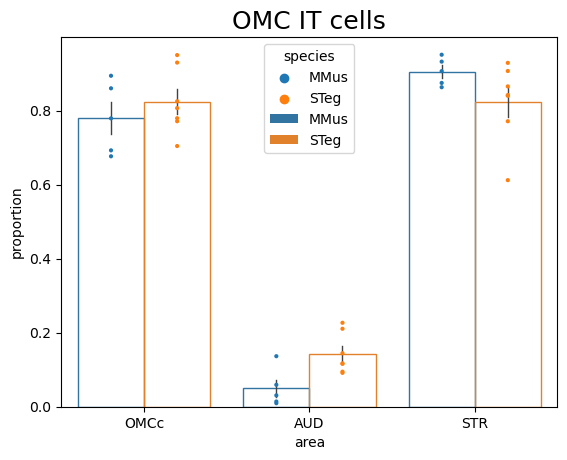

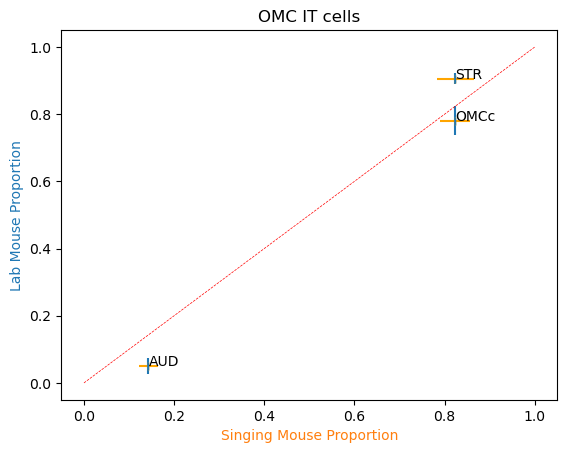

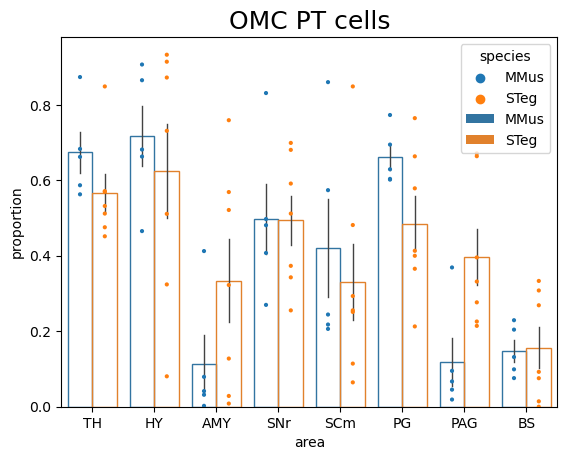

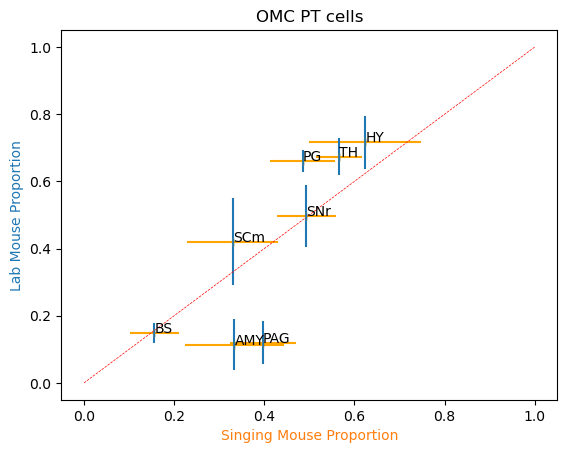

In [97]:
dot_bar_plot(omc_it_prop, title="OMC IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_it_prop, title="OMC IT cells")
plt.show()

dot_bar_plot(omc_pt_prop, title="OMC PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_pt_prop, title="OMC PT cells")
plt.show()

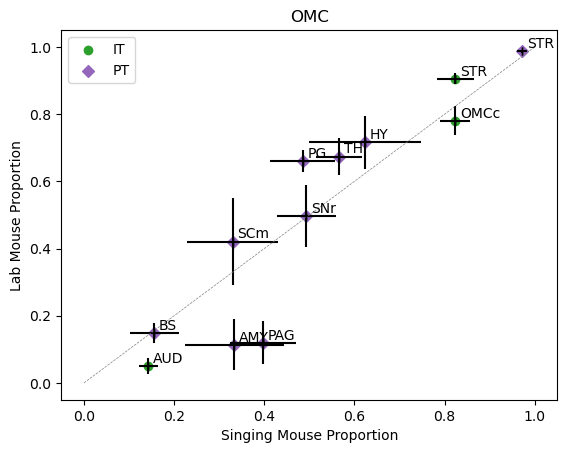

In [226]:
# combine IT and PT
sp_stats_it = stvmm_calc_stats(omc_it_prop)
sp_stats_it['type'] = "IT"
sp_stats_pt = stvmm_calc_stats(omc_pt_prop)
sp_stats_pt['type'] = "PT"

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])

stvmm_area_scatter_type(sp_stats, title="OMC")
# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

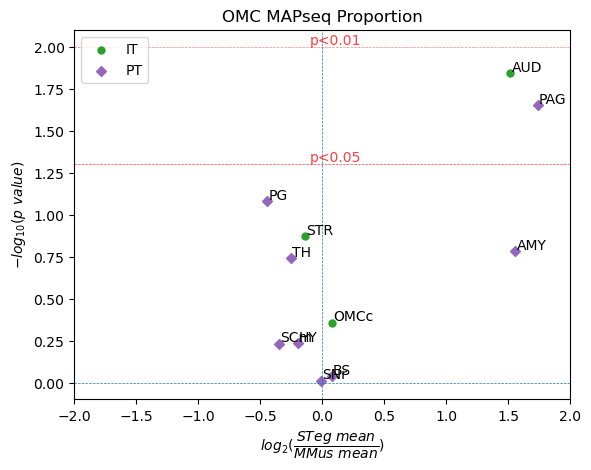

In [147]:
omc_it_prop['type'] = "IT"
omc_pt_prop['type'] = "PT"

omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
plot = stvmm_calc_ttest(omc_prop)
plot
plot_volcano(plot, title="OMC MAPseq Proportion", shape="type")
plt.xlim(-2,2)


plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")
